In [1]:
import os 
import sys 

sys.path.insert(0, '..')

In [2]:
from bio_check import Verifier
from pprint import pp

In [3]:
sbml_fp = "../model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml"
omex_fp = sbml_fp.replace("/BIOMD0000000012_url.xml", ".omex")
report_fp = omex_fp.replace(".omex", "/reports.h5")
start = 400
end = 1000
nsteps = 600 
comparison_id = "test_notebook_sbml0"
simulators = ["copasi", "tellurium"]
selection_list = ["cI mRNA"]

In [4]:
verify = Verifier()

{'bio-check-message': 'Hello from the Verification Service API!'}


In [5]:
# inspect public methods and attributes

_dir = dir(verify)

for m in _dir:
    print(m) if not m.startswith("_") else None

data
endpoint_root
export_csv
export_plot
get_compatible
get_observables
get_verify_output
read_observables
select_observables
submitted_jobs
verify_omex
verify_sbml
visualize_comparison
visualize_outputs


In [6]:
# there is a historical record in the Verifier object that can be accessed

verify.submitted_jobs


[]

In [7]:
# submit a new verification 

submission_1 = verify.verify_sbml(sbml_filepath=sbml_fp, comparison_id=comparison_id, start=start, end=end, steps=nsteps, simulators=['copasi', 'tellurium'])

In [8]:
pp(submission_1), pp(verify.submitted_jobs)

{'job_id': 'test_notebook_sbml0_8dd25aad-917c-4b4d-9709-2702bc9baceb',
 'status': 'PENDING',
 'timestamp': '2024-08-02 19:58:52.971531',
 'comparison_id': 'test_notebook_sbml0',
 'path': 'uploads/test_notebook_sbml0_8dd25aad-917c-4b4d-9709-2702bc9baceb/BIOMD0000000012_url.xml',
 'start': 400,
 'end': 1000,
 'steps': 600,
 'simulators': ['copasi,tellurium'],
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}
[{'job_id': 'test_notebook_sbml0_8dd25aad-917c-4b4d-9709-2702bc9baceb',
  'status': 'PENDING',
  'timestamp': '2024-08-02 19:58:52.971531',
  'comparison_id': 'test_notebook_sbml0',
  'path': 'uploads/test_notebook_sbml0_8dd25aad-917c-4b4d-9709-2702bc9baceb/BIOMD0000000012_url.xml',
  'start': 400,
  'end': 1000,
  'steps': 600,
  'simulators': ['copasi,tellurium'],
  'include_output': True,
  'rTol': None,
  'aTol': None,
  'selection_list': None}]


(None, None)

In [9]:
submission_2 = verify.verify_omex(omex_filepath=omex_fp, comparison_id=comparison_id, truth=report_fp)

Selection list: None


In [5]:
pp(verify.submitted_jobs)

[]


In [12]:
verify.submitted_jobs.append('test_notebook_sbml0_d8e12e53-08b3-462d-9fbd-38e19ba3d7f6')

In [14]:
verify.submitted_jobs.pop(0)

{'job_id': 'test_notebook_sbml0_8dd25aad-917c-4b4d-9709-2702bc9baceb',
 'status': 'PENDING',
 'timestamp': '2024-08-02 19:58:52.971531',
 'comparison_id': 'test_notebook_sbml0',
 'path': 'uploads/test_notebook_sbml0_8dd25aad-917c-4b4d-9709-2702bc9baceb/BIOMD0000000012_url.xml',
 'start': 400,
 'end': 1000,
 'steps': 600,
 'simulators': ['copasi,tellurium'],
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [15]:
# use job id generated from submission to poll gateway

priority = 0
sbml_job_id = verify.submitted_jobs[0]
# omex_job_id = verify.submitted_jobs.pop(priority)['job_id']

sbml = verify.get_verify_output(sbml_job_id)

In [14]:
# we can call this multiple times until ready

omex = verify.get_verify_output(omex_job_id)

In [17]:
omex_job_id

'utc_comparison_omex_4c926d83-8738-49c0-b16e-18b65266bc56'

In [19]:
# use selection list to return only one observable

selection_list = ["cI mRNA"]

submission_3 = verify.verify_sbml(sbml_filepath=sbml_fp, start=400, end=100, steps=600, comparison_id="notebook_test_sbml_selection_list", selection_list=selection_list)

In [20]:
submission_3

{'job_id': 'notebook_test_sbml_selection_list_239ed2f9-419c-4d5b-aed3-aa3fc211df9f',
 'status': 'PENDING',
 'timestamp': '2024-08-02 19:37:13.784875',
 'comparison_id': 'notebook_test_sbml_selection_list',
 'path': 'uploads/notebook_test_sbml_selection_list_239ed2f9-419c-4d5b-aed3-aa3fc211df9f/BIOMD0000000012_url.xml',
 'start': 400,
 'end': 100,
 'steps': 600,
 'simulators': ['copasi,tellurium'],
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': ['cI mRNA']}

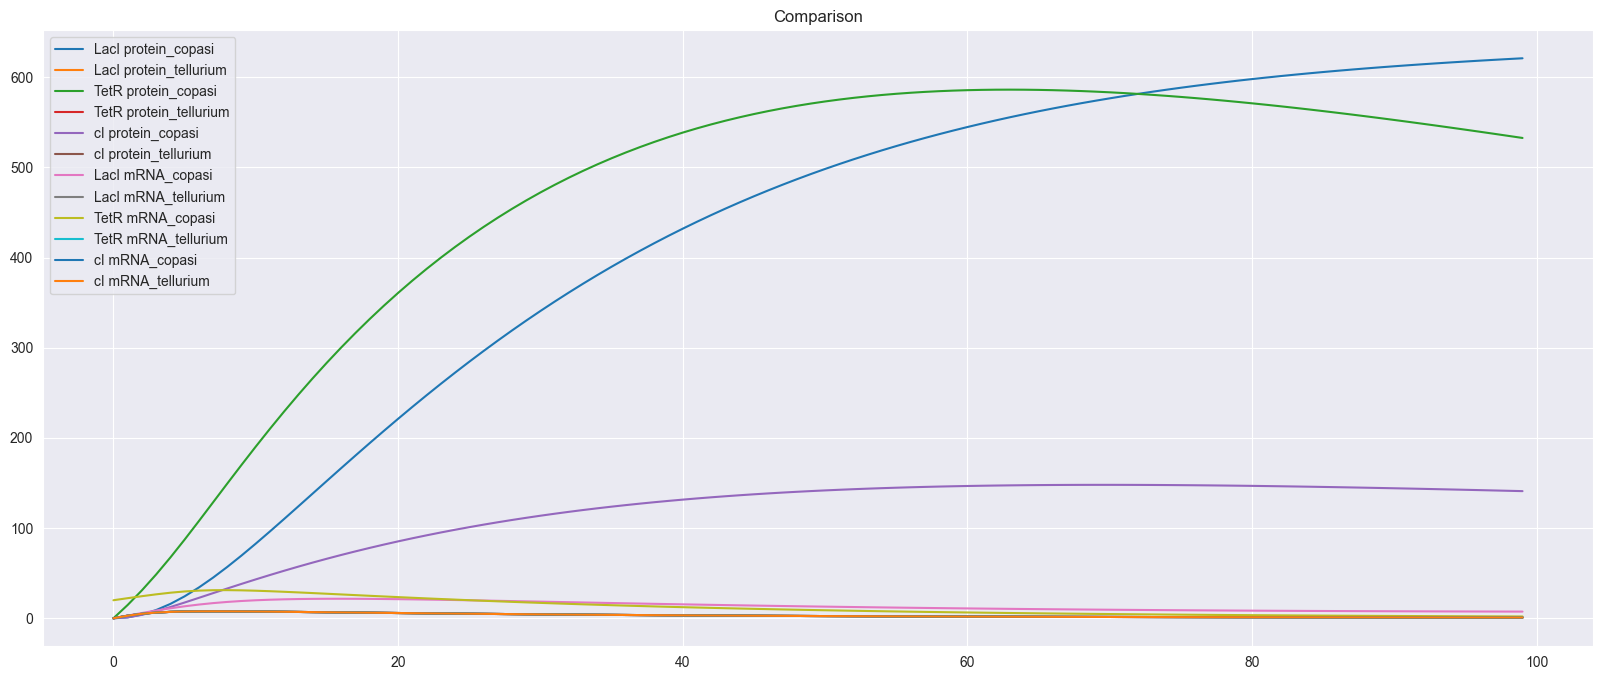

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt


def visualize(data: dict, simulators):
    """Visualize simulation output data, not comparison data!"""
    # plt.figure(figsize=(20, 8))
    spec_names = list(data['content']['results']['results'].keys())
    fig, axes = plt.subplots(nrows=len(spec_names), ncols=len(simulators), sharex=True, sharey=True)
    for species_name, species_data in data['content']['results']['results'].items():
        output_data = species_data.get('output_data')
        if output_data is not None:
            for simulator_name, simulator_output in output_data.items():
                
                sns.lineplot(data=simulator_output, label=f"{species_name}_{simulator_name}")
    
    plt.legend()
    plt.grid(True)
    plt.title("Comparison")
    return plt.show()


visualize(sbml)

In [49]:

def f(_x):
    def _f():
        x = _x.copy()
        while len(x):
            for i, n in enumerate(x):
                print(x)
                x.remove(n)
    from time import sleep
    tries = 0
    while tries < 2:
        _f()
        v = ''
        for _ in range(5):
            v += '.'
            print(v)
            sleep(0.5)
        _x.append([list(range(x)) for x in range(10)])
        tries += 1
    
    

            

In [50]:
f(_x=list(range(3)))

[0, 1, 2]
[1, 2]
[1]
.
..
...
....
.....
[0, 1, 2, [[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]]
[1, 2, [[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]]
[1, [[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]]
[[[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]]
.
..
...
....
.....


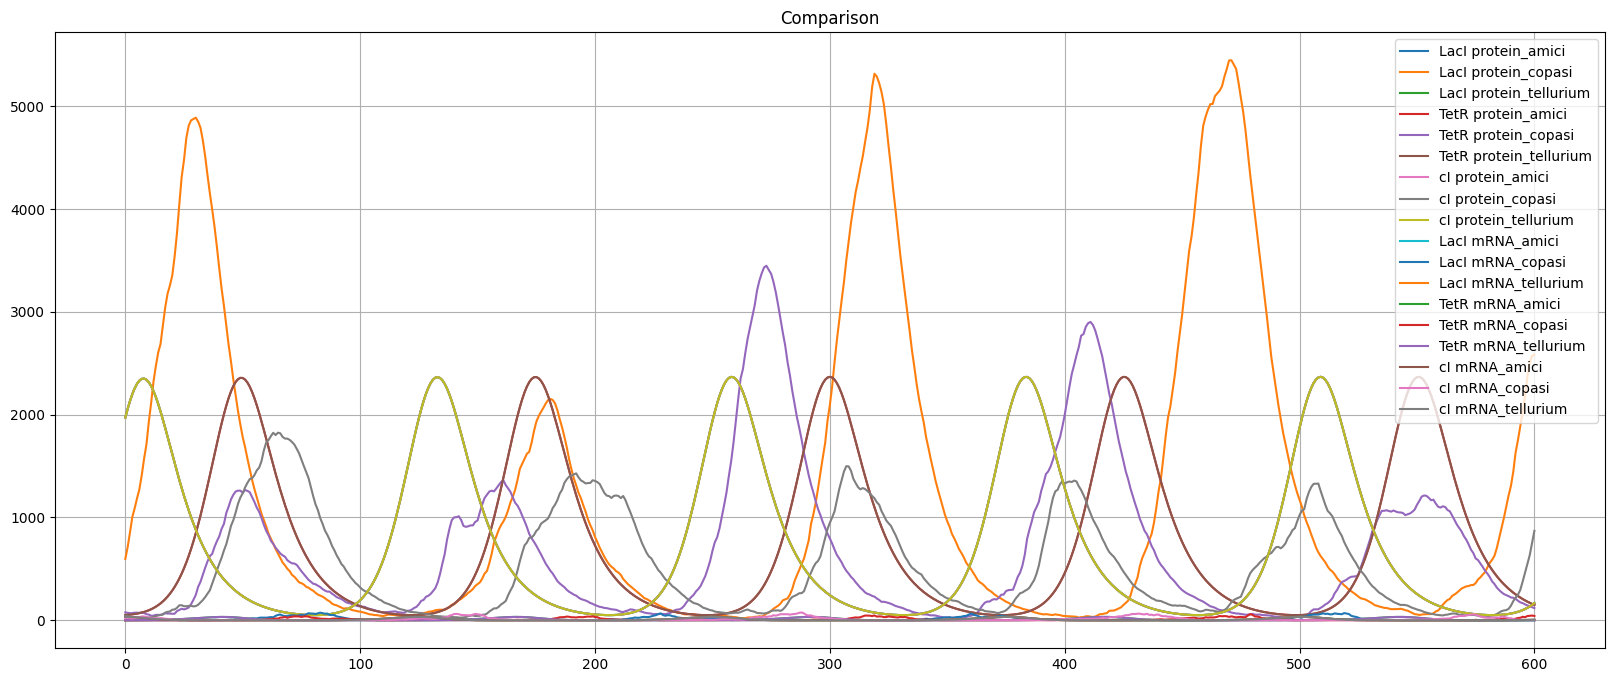

In [18]:
visualize(test_data)

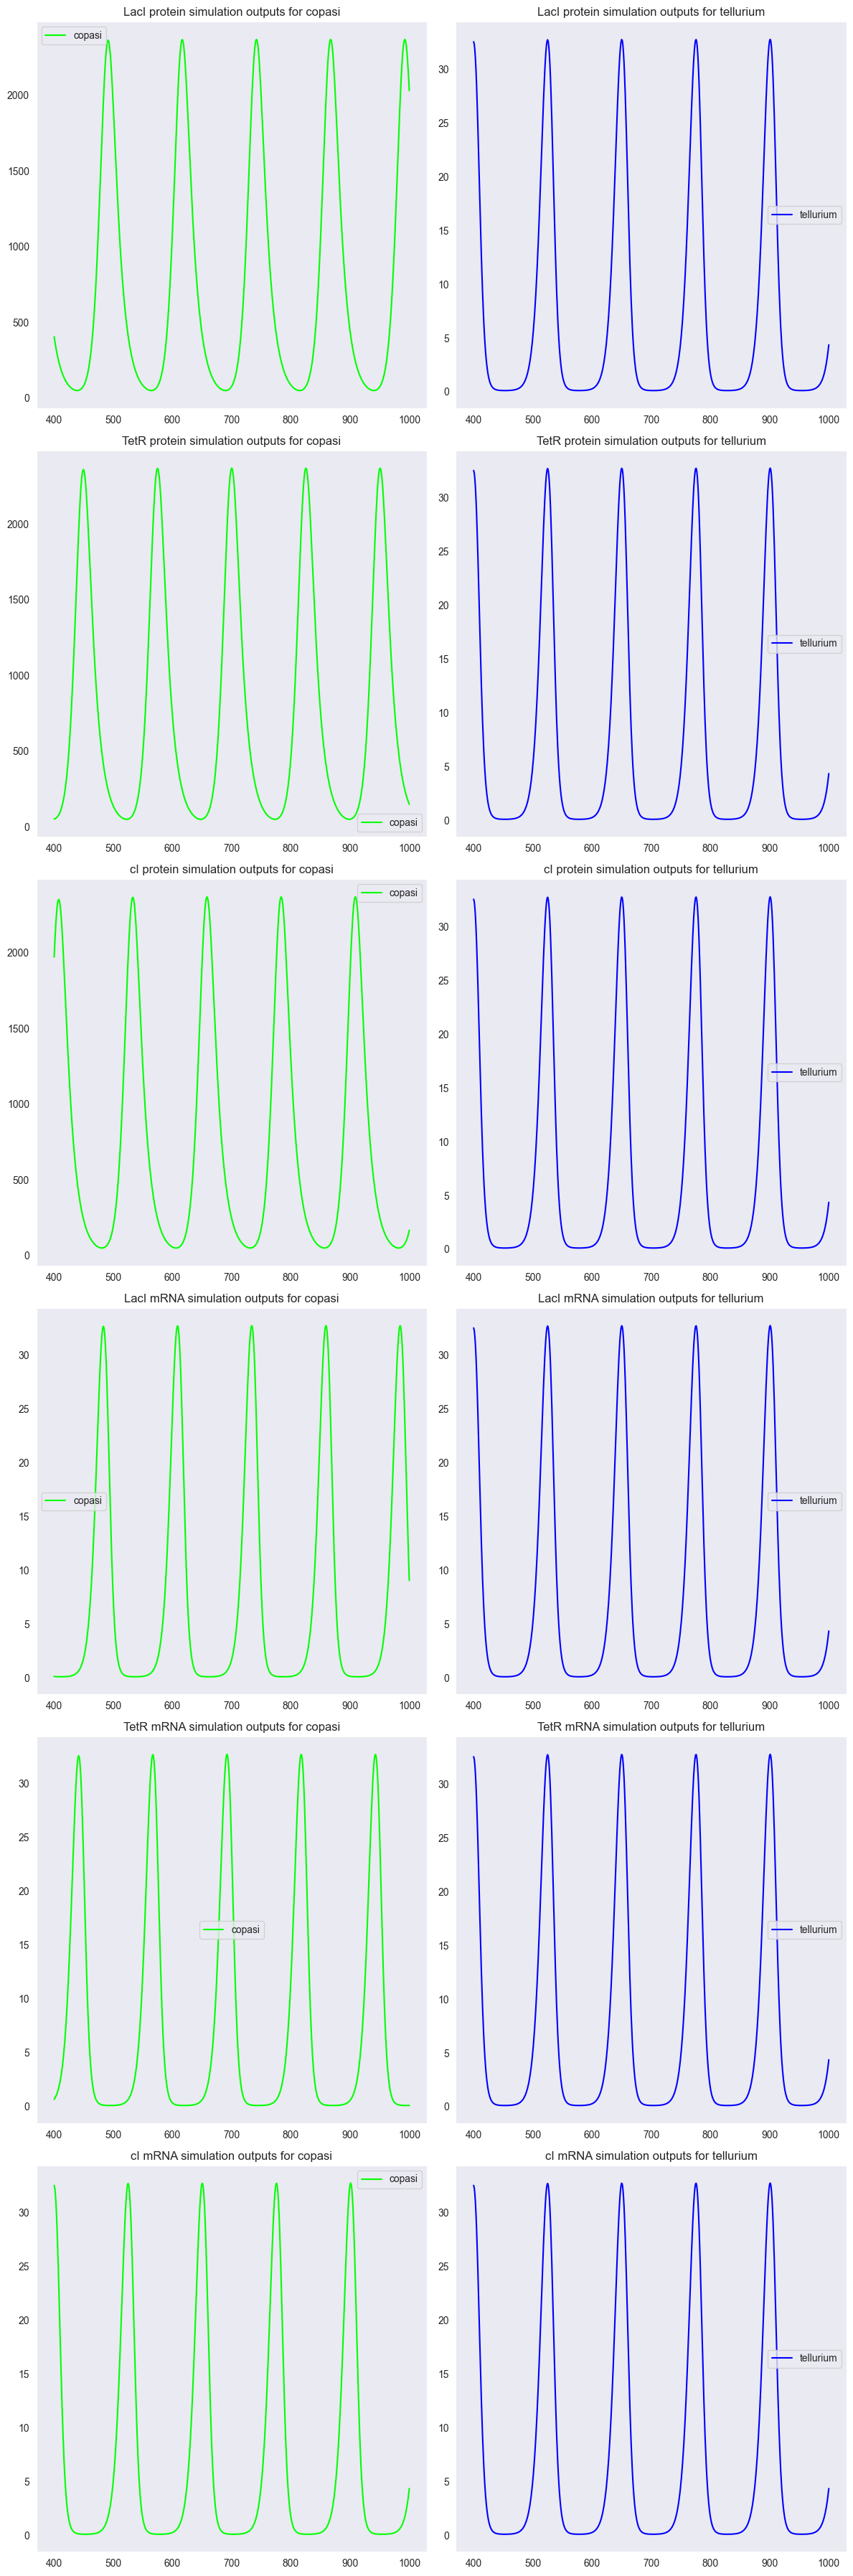

In [16]:
# verify using default simulator hue

plots = verify.visualize_outputs(data=sbml, simulators=simulators, output_start=start, output_end=end, num_points=nsteps, hue='simulators')

In [13]:
import os 
for files in os.listdir('./'):
    if not files.endswith('.ipynb'):
        os.remove(files)

In [14]:
# save the generated plots to a file

plot_path = f"./{comparison_id}.pdf"
verify.export_plot(plots, plot_path)

In [15]:
!ls ./

bio_check_demo.ipynb    test_notebook_sbml0.pdf


In [19]:
%matplotlib notebook

In [20]:
# using the species hue

verify.visualize_outputs(sbml, simulators, output_start=start, output_end=end, num_points=nsteps, hue='species')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

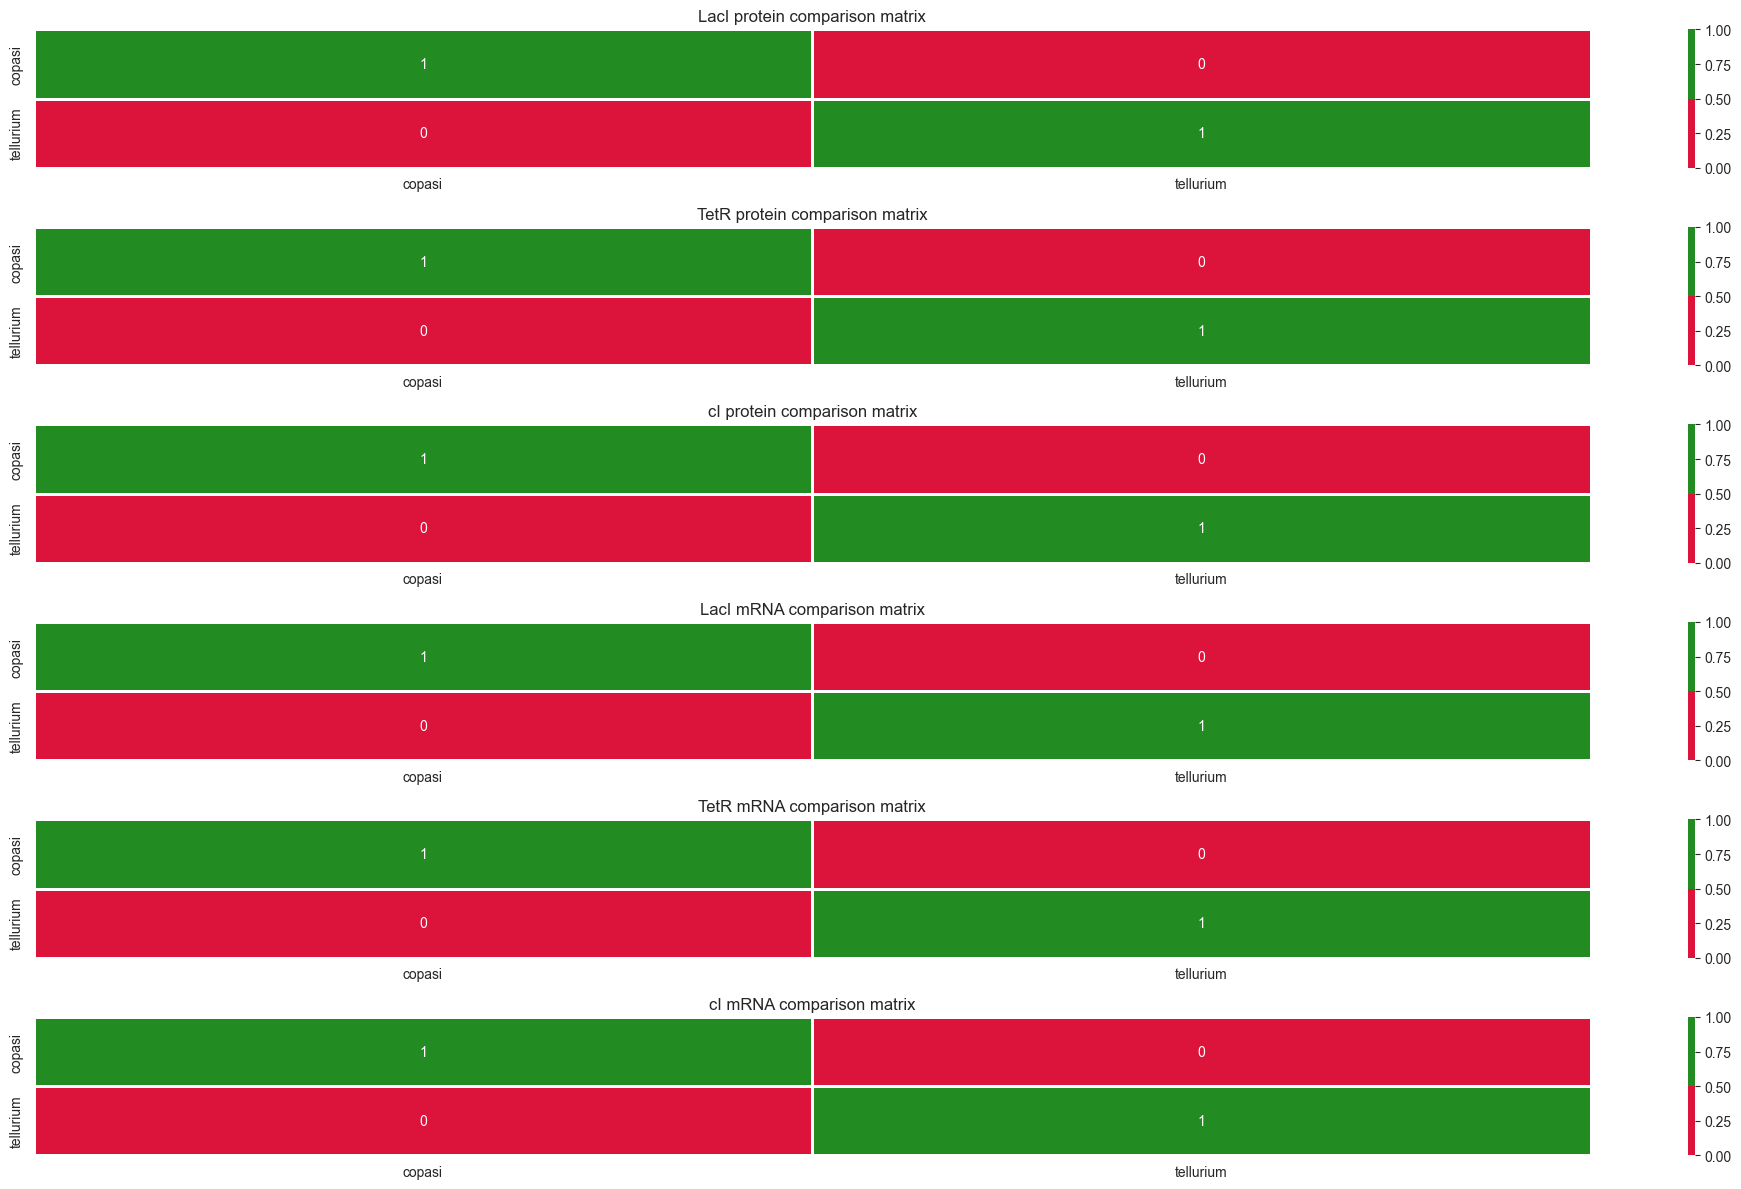

In [14]:
# visualize comparison matrix using the specified comparison type
comparison_plots = verify.visualize_comparison(data=sbml, simulators=simulators, comparison_type='proximity')

In [15]:
# save comparison viz
verify.save_plot(comparison_plots, f"./{comparison_id}_comparison_plot.pdf")

In [16]:
!ls ./

bio_check_demo.ipynb                    test_notebook_sbml0_comparison_plot.pdf


In [19]:
sbml_csv_dest = f"./{comparison_id}_output_data.csv"

In [17]:
# export output data to csv
verify.export_csv(data=sbml, simulators=simulators, save_dest=sbml_csv_dest)

In [20]:
!ls ./

bio_check_demo.ipynb                    test_notebook_sbml0_output_data.csv
test_notebook_sbml0_comparison_plot.pdf


In [21]:
import pandas as pd 

pd.read_csv(sbml_csv_dest)

,Unnamed: 0,LacI protein_copasi,LacI protein_tellurium,TetR protein_copasi,TetR protein_tellurium,cI protein_copasi,cI protein_tellurium,LacI mRNA_copasi,LacI mRNA_tellurium,TetR mRNA_copasi,TetR mRNA_tellurium,cI mRNA_copasi,cI mRNA_tellurium
0,0,405.556530,32.524113,51.895620,32.524113,1971.270446,32.524113,0.145452,32.524113,0.689216,32.524113,32.523889,32.524113
1,1,379.346144,32.302734,53.318683,32.302734,2056.480504,32.302734,0.138166,32.302734,0.774587,32.302734,32.302454,32.302734
2,2,354.847020,31.777694,55.257876,31.777694,2133.476360,31.777694,0.132258,31.777694,0.871935,31.777694,31.777281,31.777694
3,3,331.952917,30.946985,57.764172,30.946985,2200.761993,30.946985,0.127480,30.946985,0.982864,30.946985,30.946407,30.946985
4,4,310.563213,29.818984,60.896516,29.818984,2256.962984,29.818984,0.123632,29.818984,1.109172,29.818984,29.818316,29.818984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,596,2285.733291,2.679439,193.461304,2.679439,109.139883,2.679439,16.288641,2.679439,0.112850,2.679439,2.679961,2.679439
597,597,2234.854632,3.029693,181.262111,3.029693,120.941340,3.029693,14.271736,3.029693,0.113085,3.029693,3.030281,3.029693
598,598,2174.273909,3.423710,169.882590,3.423710,134.444280,3.423710,12.377590,3.423710,0.113662,3.423710,3.424372,3.423710
599,599,2105.563022,3.865997,159.270147,3.865997,149.843019,3.865997,10.633981,3.865997,0.114584,3.865997,3.866741,3.865997


In [22]:
verify.observables_dataframe(data=sbml, simulators=simulators)

,LacI protein_copasi,LacI protein_tellurium,TetR protein_copasi,TetR protein_tellurium,cI protein_copasi,cI protein_tellurium,LacI mRNA_copasi,LacI mRNA_tellurium,TetR mRNA_copasi,TetR mRNA_tellurium,cI mRNA_copasi,cI mRNA_tellurium
0,405.556530,32.524113,51.895620,32.524113,1971.270446,32.524113,0.145452,32.524113,0.689216,32.524113,32.523889,32.524113
1,379.346144,32.302734,53.318683,32.302734,2056.480504,32.302734,0.138166,32.302734,0.774587,32.302734,32.302454,32.302734
2,354.847020,31.777694,55.257876,31.777694,2133.476360,31.777694,0.132258,31.777694,0.871935,31.777694,31.777281,31.777694
3,331.952917,30.946985,57.764172,30.946985,2200.761993,30.946985,0.127480,30.946985,0.982864,30.946985,30.946407,30.946985
4,310.563213,29.818984,60.896516,29.818984,2256.962984,29.818984,0.123632,29.818984,1.109172,29.818984,29.818316,29.818984
...,...,...,...,...,...,...,...,...,...,...,...,...
596,2285.733291,2.679439,193.461304,2.679439,109.139883,2.679439,16.288641,2.679439,0.112850,2.679439,2.679961,2.679439
597,2234.854632,3.029693,181.262111,3.029693,120.941340,3.029693,14.271736,3.029693,0.113085,3.029693,3.030281,3.029693
598,2174.273909,3.423710,169.882590,3.423710,134.444280,3.423710,12.377590,3.423710,0.113662,3.423710,3.424372,3.423710
599,2105.563022,3.865997,159.270147,3.865997,149.843019,3.865997,10.633981,3.865997,0.114584,3.865997,3.866741,3.865997


In [10]:
test_sbml_data = verify.get_verify_output(submission_1['job_id'])

KeyError: 'amici'

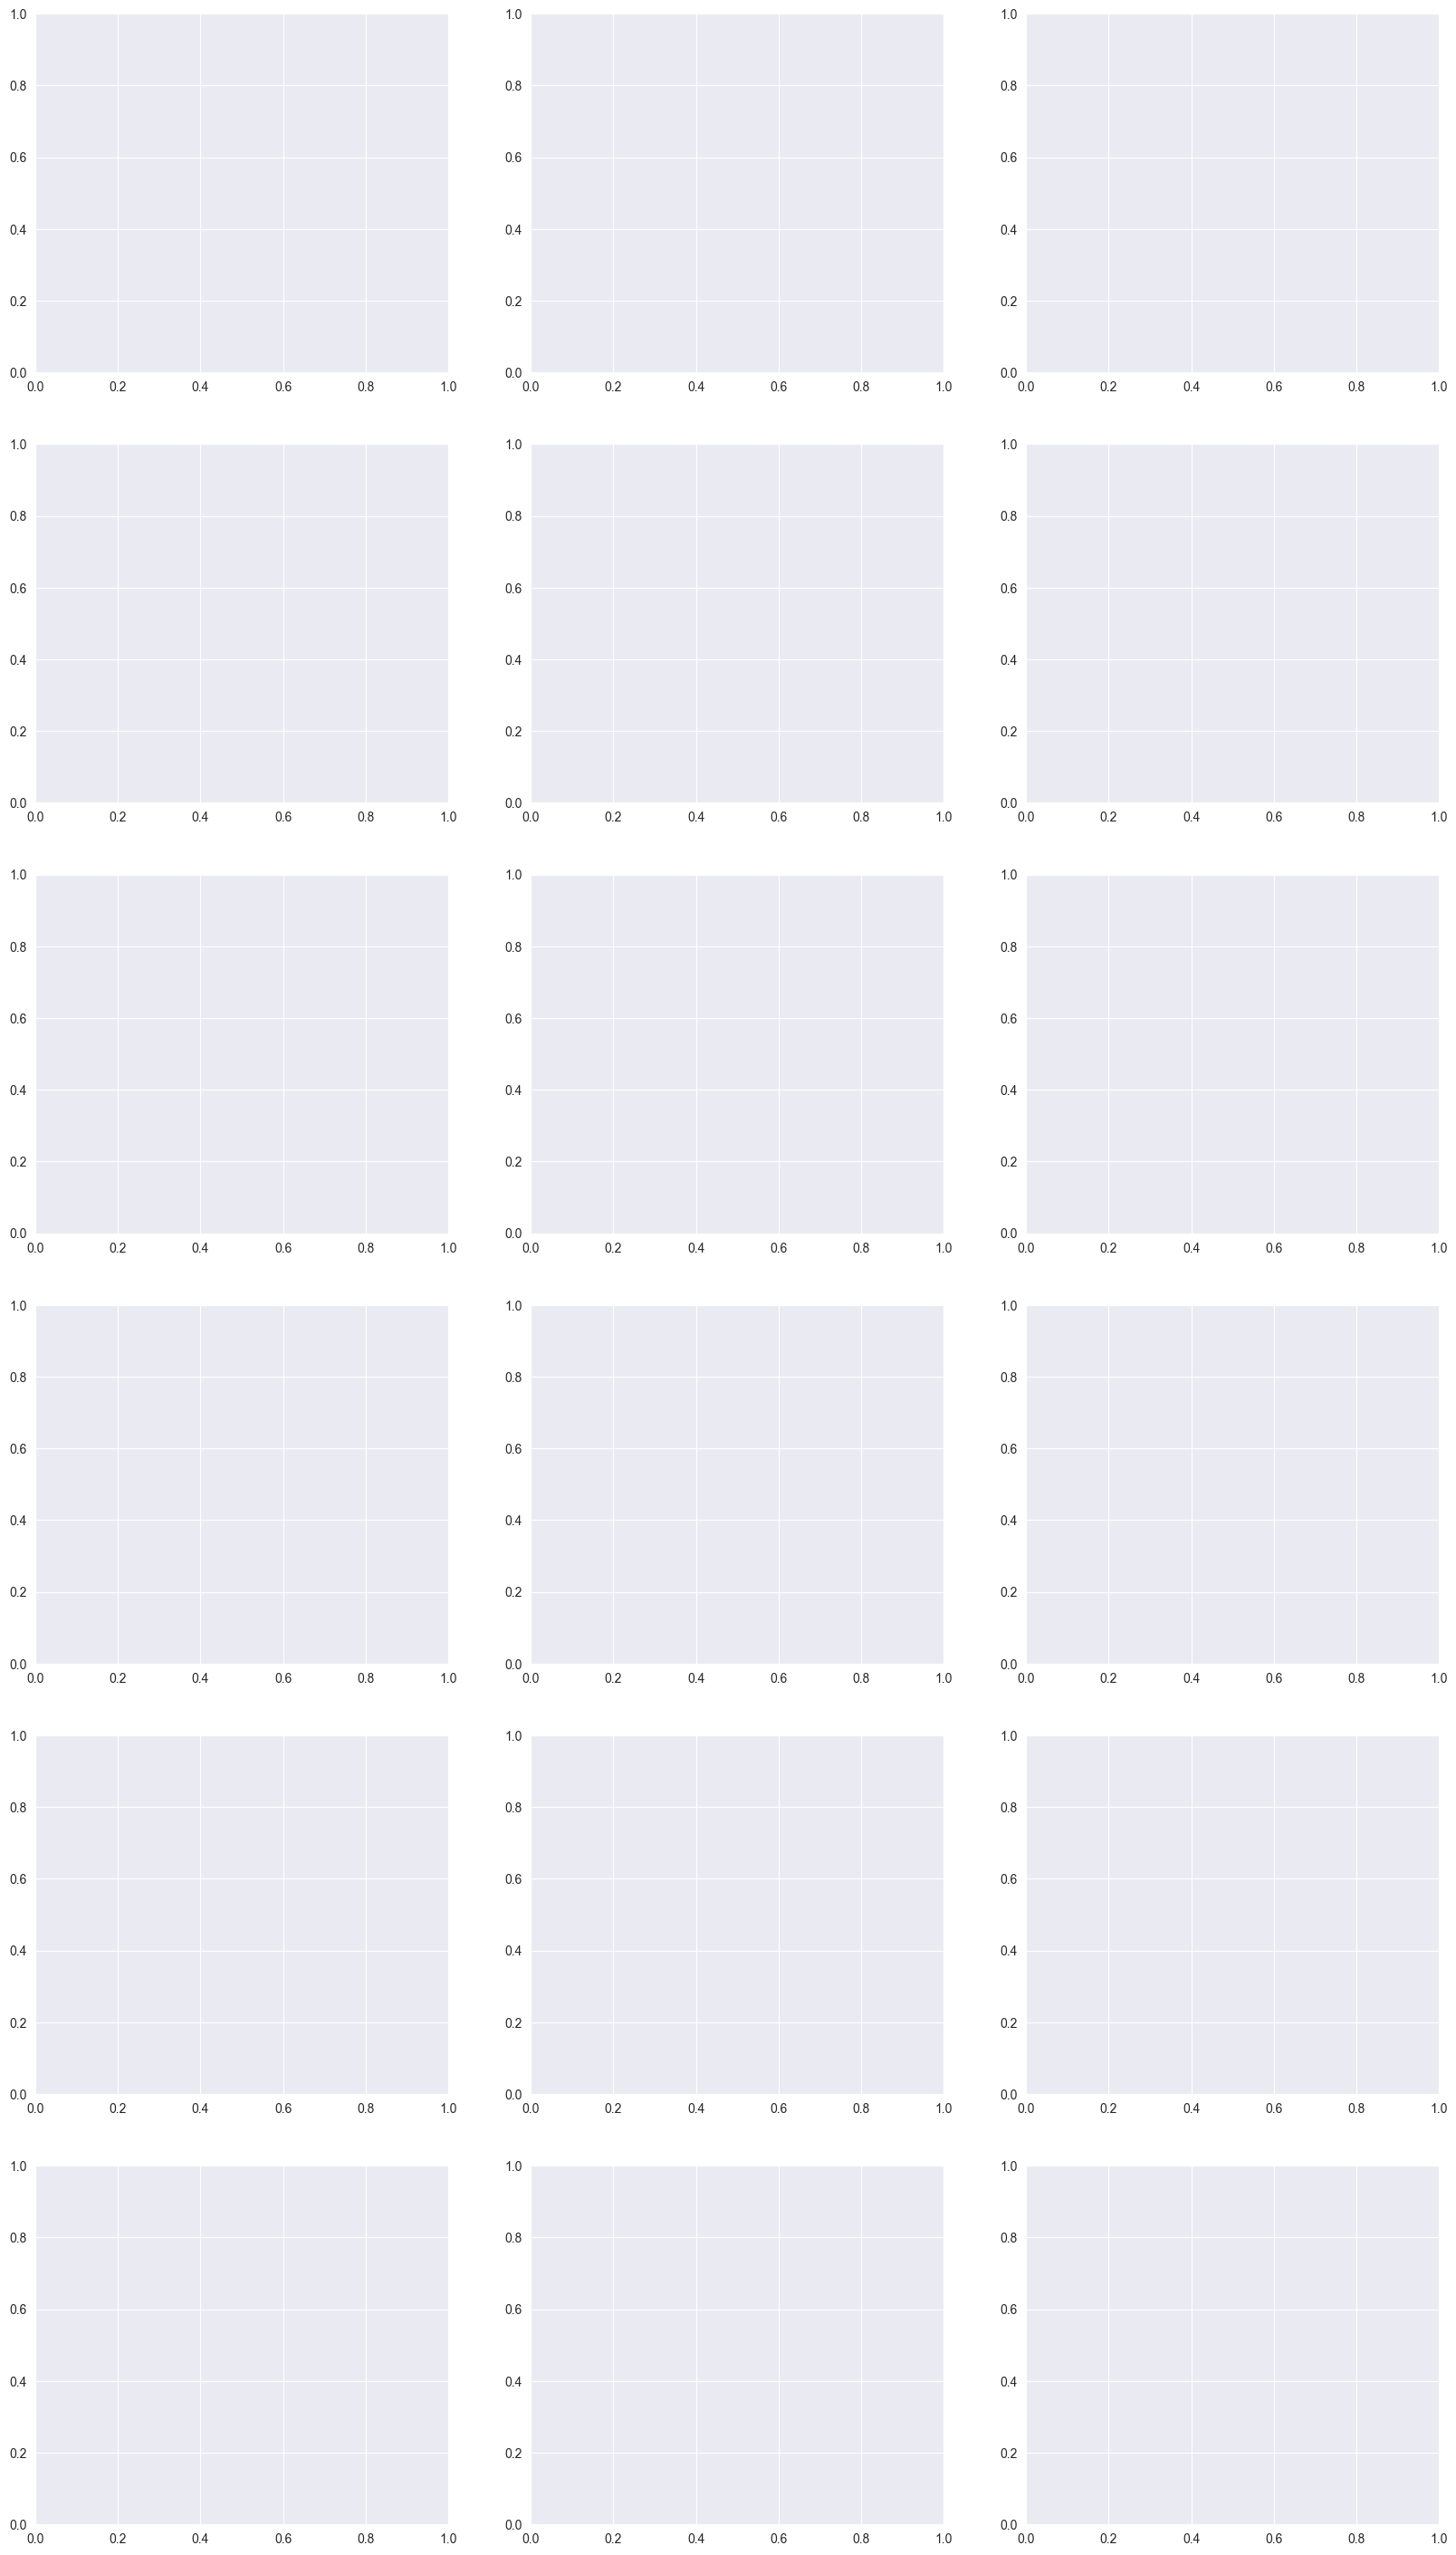

In [11]:
verify.visualize_outputs(data=test_sbml_data, simulators=simulators, output_start=start, output_end=end, num_points=points, hue='simulators')

In [12]:
sbml1 = verify.verify_sbml(sbml_filepath=sbml_fp, comparison_id=comparison_id, end=end, number_of_steps=nsteps, simulators=['copasi', 'tellurium'])

In [13]:
sbml1

{'job_id': 'test_notebook_sbml0_17b1b858-1709-4624-8a47-bc69cbbc1319',
 'status': 'PENDING',
 'timestamp': '2024-08-02 15:47:46.882508',
 'comparison_id': None,
 'path': 'uploads/test_notebook_sbml0_17b1b858-1709-4624-8a47-bc69cbbc1319/BIOMD0000000012_url.xml',
 'end': 10,
 'steps': 100,
 'simulators': ['copasi,tellurium'],
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [14]:
sbml1_output = verify.get_verify_output(sbml1['job_id'])

In [15]:
sbml1_output

{'content': {'status': 'PENDING',
  'job_id': 'test_notebook_sbml0_17b1b858-1709-4624-8a47-bc69cbbc1319',
  'path': 'uploads/test_notebook_sbml0_17b1b858-1709-4624-8a47-bc69cbbc1319/BIOMD0000000012_url.xml',
  'simulators': ['copasi,tellurium'],
  'timestamp': '2024-08-02 15:47:46.882508',
  'end': 10,
  'steps': 100,
  'include_outputs': True,
  'rTol': None,
  'aTol': None,
  'selection_list': None}}